<a href="https://www.kaggle.com/code/subhammudi/30-03-2022-ml-lab-3?scriptVersionId=93361657" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
 import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("../input/autompgdatasetzip/auto-mpg.csv")
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [4]:
miss_val = df[df['horsepower'].isnull()]
print(miss_val)

Empty DataFrame
Columns: [mpg, cylinders, displacement, horsepower, weight, acceleration, model year, origin, car name]
Index: []


{'whiskers': [<matplotlib.lines.Line2D at 0x7f4314e0f0d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f4314e0fb10>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f4314e0f190>],
 'medians': [<matplotlib.lines.Line2D at 0x7f4314e1f210>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f4314e1f550>],
 'means': []}

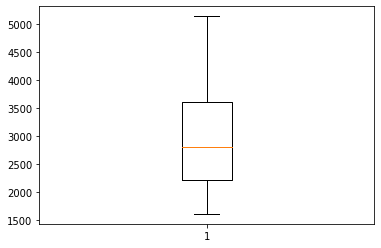

In [5]:
plt.boxplot(df['weight'])

(array([55., 78., 50., 71., 23., 41., 26., 20., 16., 18.]),
 array([ 0. ,  9.3, 18.6, 27.9, 37.2, 46.5, 55.8, 65.1, 74.4, 83.7, 93. ]),
 <BarContainer object of 10 artists>)

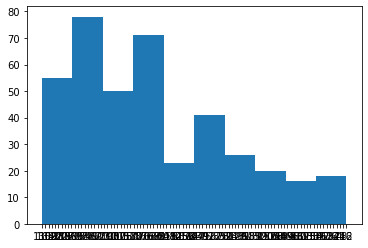

In [6]:
plt.hist(df['horsepower'])

In [7]:
def find_outlier(ds, col):
    quart1 = ds[col].quantile(0.25)
    quart3 = ds[col].quantile(0.75)
    IQR = quart3 - quart1 #Inter-quartile range
    low_val = quart1 - 1.5*IQR
    high_val = quart3 + 1.5*IQR
    ds = ds.loc[(ds[col] < low_val) | (ds[col] > high_val)]
    return ds
    outliers = find_outlier(df, 'displacement')
    outliers

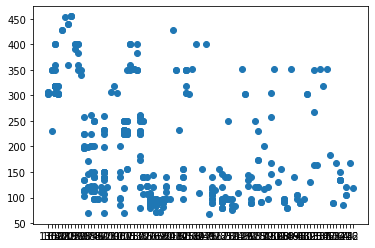

In [8]:
plt.scatter(df['horsepower'],df['displacement'])
plt.show()